<b>
<p>
<center>
<font size='5'>
George Washington University
</font>
</center>
</p>

<p>
<center>
<font size='4'>
Machine Learning 1 Final Term Project
</font>
</center>
</p>
    
<p>
<center>
<font size='4'>
Predicting Road signs using CNN
</font>
</center>
</p>

<p>
<center>
<font size='3'>
Data Science, Columbian College of Arts & Sciences
</font>
</center>
</p>

<p>
<center>
<font size='3'>
Atharva Haldankar
</font>
</center>
</p>
</b>


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt#to plot accuracy
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split #to split training and testing data
from tensorflow.keras.utils import to_categorical#to convert the labels present in y_train and t_test into one-hot encoding
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout#to create CNN
import tensorflow as tf
from tensorflow import keras
import random
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
cur_path =  '/content/drive/My Drive/Colab Notebooks/spring_2021/project/'

# Get the absolute path of the deep utilities folder
abspath_util_deep = '/content/drive/My Drive/Colab Notebooks/spring_2021/code/utilities/p3_deep_learning/'

In [ ]:
#%%
data = []
labels = []
classes = 43
path = os.path.join(cur_path,"data",'myData')

# Loading the data by reading the images used for training.


In [4]:
#Retrieving the images and their labels
count = 0
images = []
classNo = []
myList = os.listdir(path)
print("Total Classes Detected:",len(myList))
noOfClasses=len(myList)
print("Importing Classes.....")
for x in range (0,len(myList)):
    myPicList = os.listdir(path+"/"+str(count))
    for y in myPicList:
        curImg = cv2.imread(path+"/"+str(count)+"/"+y)
        images.append(curImg)
        classNo.append(count)
    print(count, end =" ")
    count +=1
print(" ")
images = np.array(images)
classNo = np.array(classNo)

Total Classes Detected: 43
Importing Classes.....
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42  


# Warning

In [5]:
import warnings
# Ignore warnings
warnings.filterwarnings('ignore')

# Matplotlib

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

#Tesorflow

In [7]:
# The magic below allows us to use tensorflow version 2.x
%tensorflow_version 2.x 
import tensorflow as tf
from tensorflow import keras

# Random Seed

In [8]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

#Data Preprocessing

In [9]:
# Change working directory to the absolute path of the deep utilities folder
%cd $abspath_util_deep

# Import the deep utitilities
%run pmlm_utilities_deep.ipynb

/content/drive/My Drive/Colab Notebooks/spring_2021/code/utilities/p3_deep_learning


## Printing the Classes

In [10]:
target = np.unique(classNo)
print(target)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


## Printing the nummber of classes

In [11]:
n_classes = len(target)
print(n_classes)

43


# Spitting the data in train test and Validation

In [12]:
#%%
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=0.2)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

# Using Image Generator to analyse the images in all possible states.

In [15]:
dataGen = ImageDataGenerator(width_shift_range=0.1,
                             
                             height_shift_range=0.1,
                             zoom_range=0.2,  
                             shear_range=0.1,  # MAGNITUDE OF SHEAR ANGLE
                             rotation_range=10)  # DEGREES
dataGen.fit(X_train)
batches = dataGen.flow(X_train, y_train,
                       batch_size=20)  
X_batch, y_batch = next(batches)
y_train = to_categorical(y_train, noOfClasses)
y_validation = to_categorical(y_validation, noOfClasses)
y_test = to_categorical(y_test, noOfClasses)


# Training

## Creating the directory for the model

In [16]:
directory = os.path.dirname(cur_path + '/result/model/')
if not os.path.exists(directory):
    os.makedirs(directory)

## Building the architecture of the model

In [44]:
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))


In [18]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          36928     
                                                        

## Setting Callbacks

In [45]:
# ModelCheckpoint callback
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=cur_path + '/result/model/model.h5',
                                                      save_best_only=True,
                                                      save_weights_only=True)

# EarlyStopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

# ReduceLROnPlateau callback
reduce_lr_on_plateau_cb = keras.callbacks.ReduceLROnPlateau(factor=0.1,
                                                            patience=1)

## Compiling the model

In [46]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the model

In [47]:
# Train, evaluate and save the best model
steps_per_epoch = len(X_train)//50
history = model.fit(X_train,y_train, batch_size=400, epochs=7, validation_data=(X_validation,y_validation),callbacks=[model_checkpoint_cb,early_stopping_cb,reduce_lr_on_plateau_cb])

Epoch 1/7
56/56 [==============================] - 104s 2s/step - loss: 4.4002 - accuracy: 0.1181 - val_loss: 2.5827 - val_accuracy: 0.3926 - lr: 0.0010
Epoch 2/7
56/56 [==============================] - 100s 2s/step - loss: 2.2978 - accuracy: 0.4005 - val_loss: 1.4863 - val_accuracy: 0.6774 - lr: 0.0010
Epoch 3/7
56/56 [==============================] - 98s 2s/step - loss: 1.5304 - accuracy: 0.5786 - val_loss: 0.9502 - val_accuracy: 0.8218 - lr: 0.0010
Epoch 4/7
56/56 [==============================] - 106s 2s/step - loss: 1.1068 - accuracy: 0.6828 - val_loss: 0.5742 - val_accuracy: 0.8892 - lr: 0.0010
Epoch 5/7
56/56 [==============================] - 99s 2s/step - loss: 0.8357 - accuracy: 0.7561 - val_loss: 0.3892 - val_accuracy: 0.9255 - lr: 0.0010
Epoch 6/7
56/56 [==============================] - 98s 2s/step - loss: 0.6720 - accuracy: 0.7966 - val_loss: 0.3236 - val_accuracy: 0.9409 - lr: 0.0010
Epoch 7/7
56/56 [==============================] - 100s 2s/step - loss: 0.5553 - accu

# Plotting the learning curve
## Creating the directory for the figure

In [48]:
# Make directory
directory = os.path.dirname(cur_path + '/result/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

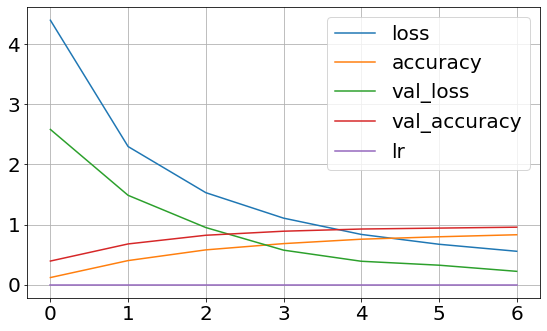

In [49]:
import pandas as pd

# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(cur_path + '/result/figure/learning_curve_before_unfreezing.pdf')
plt.show()

# Testin the best model

## Loading the best saved model

In [50]:
# Load the saved model
model.load_weights(filepath=cur_path + '/result/model/model.h5')

## Evaluating the best model

In [51]:
loss, accuracy = model.evaluate(X_test,y_test)
print("accuracy:",accuracy,"loss:",loss)

218/218 [==============================] - 8s 36ms/step - loss: 0.2230 - accuracy: 0.9537
accuracy: 0.9537356495857239 loss: 0.22301703691482544


In [52]:
def getCalssName(classNo):
  if   classNo == 0: return 'Speed Limit 20 km/h'
  elif classNo == 1: return 'Speed Limit 30 km/h'
  elif classNo == 2: return 'Speed Limit 50 km/h'
  elif classNo == 3: return 'Speed Limit 60 km/h'
  elif classNo == 4: return 'Speed Limit 70 km/h'
  elif classNo == 5: return 'Speed Limit 80 km/h'
  elif classNo == 6: return 'End of Speed Limit 80 km/h'
  elif classNo == 7: return 'Speed Limit 100 km/h'
  elif classNo == 8: return 'Speed Limit 120 km/h'
  elif classNo == 9: return 'No passing'
  elif classNo == 10: return 'No passing for vechiles over 3.5 metric tons'
  elif classNo == 11: return 'Right-of-way at the next intersection'
  elif classNo == 12: return 'Priority road'
  elif classNo == 13: return 'Yield'
  elif classNo == 14: return 'Stop'
  elif classNo == 15: return 'No vechiles'
  elif classNo == 16: return 'Vechiles over 3.5 metric tons prohibited'
  elif classNo == 17: return 'No entry'
  elif classNo == 18: return 'General caution'
  elif classNo == 19: return 'Dangerous curve to the left'
  elif classNo == 20: return 'Dangerous curve to the right'
  elif classNo == 21: return 'Double curve'
  elif classNo == 22: return 'Bumpy road'
  elif classNo == 23: return 'Slippery road'
  elif classNo == 24: return 'Road narrows on the right'
  elif classNo == 25: return 'Road work'
  elif classNo == 26: return 'Traffic signals'
  elif classNo == 27: return 'Pedestrians'
  elif classNo == 28: return 'Children crossing'
  elif classNo == 29: return 'Bicycles crossing'
  elif classNo == 30: return 'Beware of ice/snow'
  elif classNo == 31: return 'Wild animals crossing'
  elif classNo == 32: return 'End of all speed and passing limits'
  elif classNo == 33: return 'Turn right ahead'
  elif classNo == 34: return 'Turn left ahead'
  elif classNo == 35: return 'Ahead only'
  elif classNo == 36: return 'Go straight or right'
  elif classNo == 37: return 'Go straight or left'
  elif classNo == 38: return 'Keep right'
  elif classNo == 39: return 'Keep left'
  elif classNo == 40: return 'Roundabout mandatory'
  elif classNo == 41: return 'End of no passing'
  elif classNo == 42: return 'End of no passing by vechiles over 3.5 metric tons'

In [63]:
name_of_image = "speed20.png"
curImg = cv2.imread(os.path.join(cur_path,"images",name_of_image))
curImg = np.array(curImg)

curImg = cv2.resize(np.float32(curImg), (32,32))
curImg = curImg.reshape(-1,32,32,3)

predictions = model.predict(curImg)
classIndex = np.argmax(predictions)
print(getCalssName(classIndex))



Speed Limit 20 km/h


Citation:https://github.com/yuxiaohuang/teaching/blob/master/gwu/machine_learning_I/spring_2022/code/p3_deep_learning/p3_c2_supervised_learning/p3_c2_s3_convolutional_neural_networks/code_example/code_example.ipynb